In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day13/monthly-milk-production-pounds-p.csv")
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [17]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]

#alpha, beta, gamma = 0.8, 0.02, 0.1

hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
#without smoothing parameters
#fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

#with auto tuning
fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

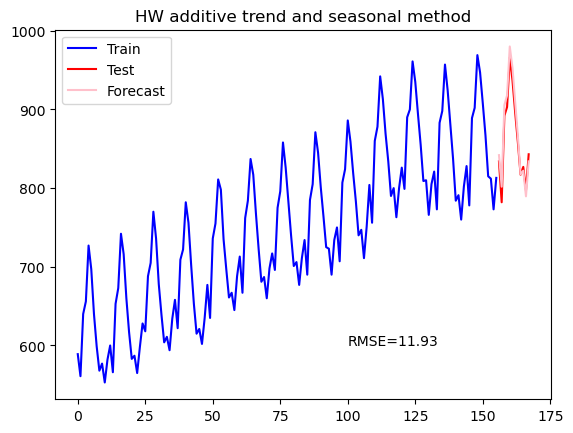

In [18]:
#plotting additve and seasonal method
y_train.plot(color='blue', label='Train')
y_test.plot(color='red', label='Test')
fcast1.plot(color='pink', label='Forecast')
error = round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100, 600, "RMSE="+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc='best')
plt.show()

In [21]:
#multiplicitve

y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]

#alpha, beta, gamma = 0.8, 0.02, 0.1

hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
#without smoothing parameters
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

#with auto tuning
#fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

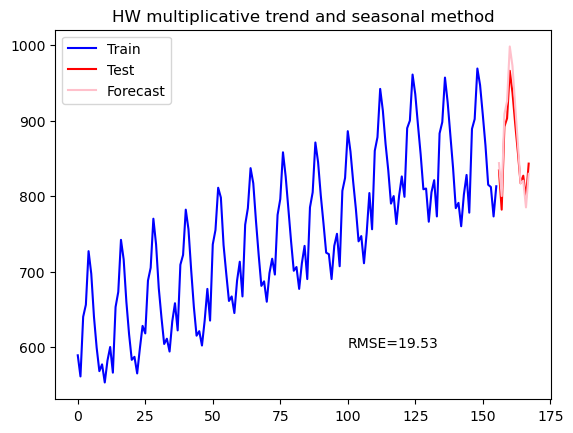

In [23]:
#plotting additve and seasonal method
y_train.plot(color='blue', label='Train')
y_test.plot(color='red', label='Test')
fcast1.plot(color='pink', label='Forecast')
error = round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100, 600, "RMSE="+str(error))
plt.title("HW multiplicative trend and seasonal method")
plt.legend(loc='best')
plt.show()